In [30]:
### git push ###

%cd '/home/undwad/gdrive/allaboutmusic'
!ls

!git add .
!git commit -m .
!git push
!git show --stat


[Errno 2] No such file or directory: '/home/undwad/gdrive/allaboutmusic'
/home/undwad/ipynb/allaboutmusic
draft-music.ipynb  miscutils.py        __pycache__  tmp
LICENSE		   music-basics.ipynb  README.md
[main 20eaa65] .
 3 files changed, 750 insertions(+), 288 deletions(-)
 create mode 100644 tmp/sinfywave01.json
Enumerating objects: 9, done.
Counting objects: 100% (9/9), done.
Delta compression using up to 4 threads
Compressing objects: 100% (5/5), done.
Writing objects: 100% (6/6), 4.69 MiB | 4.45 MiB/s, done.
Total 6 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/undwad/allaboutmusic.git
   30fff42..20eaa65  main -> main
commit 20eaa65829ff11e3db546c1ac8c71e9793cf5bd7 (HEAD -> main, origin/main, origin/HEAD)
Author: undwad <undwad@mail.ru>
Date:   Sun May 22 21:15:01 2022 +0000

    .

 draft-music.ipynb    | 331 +++++-------------------
 music-basics.ipynb   | 706 +++++++++++++++++++++++++++++++++++++++++++

In [1]:
!pwd 
!ls "./"
!cat /proc/meminfo | grep Mem

ipython = get_ipython()
ipython

import sys,re,requests

from functools            import partial
from random               import choice
from numpy                import array,linspace,sin,cos,pi,min,max,clip,stack,arange,fix,sum,zeros,ones
from numpy.random         import random
from urllib.parse         import quote,unquote,urlencode,urljoin,urlparse 
from ipywidgets           import widgets, HBox, VBox, Layout
from IPython.core.display import display, HTML, Javascript as JS
from IPython.display      import Audio,YouTubeVideo,display,clear_output
from scipy.signal         import gausspulse,sawtooth,square
from matplotlib.pyplot    import rcParams,figure,plot,subplot,grid,axhline,xlim,ylim,axis,title,xlabel,ylabel,subplots #,set_size_inches
from miscutils            import *

%matplotlib inline

print('python: ',  sys.version)
print('module: ', __name__)

import pandas
print('pandas:', pandas.__version__)
pandas.set_option('display.max_rows', None) 
pandas.set_option('display.max_columns', None)  
pandas.set_option('display.expand_frame_repr', False)
pandas.set_option('max_colwidth', None)

clear_output()
print('OK')


OK


## Music and Trigonometry

A sine wave is defined as:

### $y(t)=A*sin(2\pi ft)$
1. `f` is frequency 
2. `A` is amplitude 

Frequency is measured in Hertz (Hz), or number of complete cycles per second

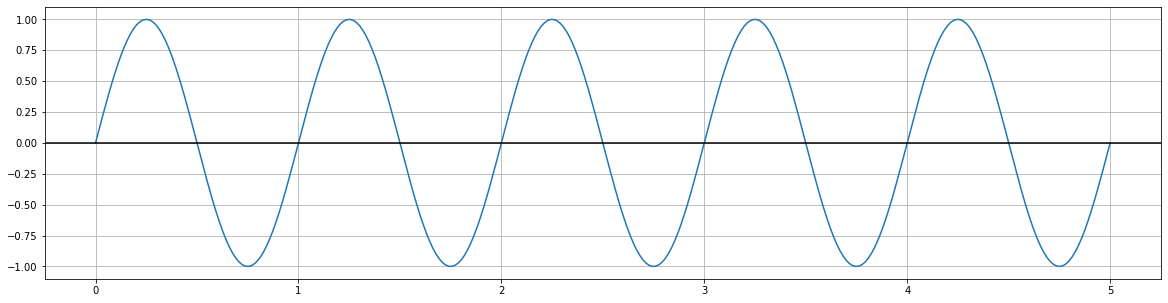

In [2]:
t = linspace(0, 5, 320)
data = sin(2 * pi * 1 * t) # <- 1 Hz
rcParams['figure.figsize'] = [20,5]
plot(t, data)
grid(True, which='both')
axhline(y=0, color='k')

In [ ]:
rcParams['figure.figsize'] = [20,5]
plot(t,   sin(2 * pi * 1   * t))
plot(t, 2*sin(2 * pi * 1  * t))

## Music and Multiplication

Previous we saw a sine wave visualized in regular cycles. When we think in terms of cycles per second, it means that for a given root frequency f, any power of 2 times f will generate sine waves that start and end together.

In music, we call the distance between these powers of two an "octave".

In [ ]:
rcParams['figure.figsize'] = [20,5]
plot(t, sin(2 * pi * 1 * t))
plot(t, sin(2 * pi * 2 * t))
plot(t, sin(2 * pi * 4 * t))

## Music and Fractions

If we mapped out frequency multiples from 1–5, we'll see that they all represent different intervals between successive multiples. For example, going from 2x to 3x is called a "perfect fifth". 3x to 4x is a "perfect fourth". And 4x to 5x is a "major third".

We can now use these relationships to fill in the octave. For example, a perfect fifth (so) is 3/2 times the base frequency and a perfect fourth (fa) is 4/3 times the base frequency. 

| Interval         | Just  | Scale     | Equal Temperament |
| ---------------- | ----- | --------- | ----------------- |
| Unison           | 1/1   | = 1.0000  |  1.0000           |
| Minor Second     | 25/24 | = 1.0417  |  1.05946          |
| Major Second     | 9/8   | = 1.1250  |  1.12246          |
| Minor Third      | 6/5   | = 1.2000  |  1.18921          |
| Major Third      | 5/4   | = 1.2500  |  1.25992          |
| Perfect Fourth   | 4/3   | = 1.3333  |  1.33483          |
| Diminished Fifth | 45/32 | = 1.4063  |  1.41421          |
| Perfect Fifth    | 3/2   | = 1.5000  |  1.49831          |
| Minor Sixth      | 8/5   | = 1.6000  |  1.58740          |
| Major Sixth      | 5/3   | = 1.6667  |  1.68179          |
| Minor Seventh    | 9/5   | = 1.8000  |  1.78180          |
| Major Seventh    | 15/8  | = 1.8750  |  1.88775          |
| Octave           | 16/8  | = 2.0000  |  2.0000           |

The "Just Scale" (sometimes referred to as "harmonic tuning" or "Helmholtz's scale") occurs naturally as a result of the overtone series for simple systems such as vibrating strings or air columns. All the notes in the scale are related by rational numbers. Unfortunately, with Just tuning, the tuning depends on the scale you are using - the tuning for C Major is not the same as for D Major, for example. Just tuning is often used by ensembles (such as for choral or orchestra works) as the players match pitch with each other "by ear."

The "equal tempered scale" was developed for keyboard instruments, such as the piano, so that they could be played equally well (or badly) in any key. It is a compromise tuning scheme. The equal tempered system uses a constant frequency multiple between the notes of the chromatic scale. Hence, playing in any key sounds equally good (or bad, depending on your point of view).


In [3]:
just_scale = { 
    'C'  : 1,      'C#' : 1.0417, 'D'  : 1.1250, 'D#' : 1.2000, 
    'E'  : 1.2500, 'F'  : 1.3333, 'F#' : 1.4063, 'G'  : 1.5000, 
    'G#' : 1.6000, 'A'  : 1.6667, 'A#' : 1.8000, 'B'  : 1.8750,     
    'Db' : 1.0417, 'Eb' : 1.2000, 'Gb' : 1.4063, 'Ab' : 1.6000, 'Bb' : 1.8000
}

equal_temperament_scale = { 
    'C'  : 1,       'C#' : 1.05946, 'D'  : 1.12246, 'D#' : 1.18921, 
    'E'  : 1.25992, 'F'  : 1.33483, 'F#' : 1.41421, 'G'  : 1.49831, 
    'G#' : 1.58740, 'A'  : 1.68179, 'A#' : 1.78180, 'B'  : 1.88775,
    'Db' : 1.05946, 'Eb' : 1.18921, 'Gb' : 1.41421, 'Ab' : 1.58740, 'Bb' : 1.78180
}

scale = just_scale

do = lambda f: f * scale['C']
re = lambda f: f * scale['D'] # major second
mi = lambda f: f * scale['E'] # major third
fa = lambda f: f * scale['F'] # perfect fourth
so = lambda f: f * scale['G'] # perfect fifth
la = lambda f: f * scale['A'] # major sixth
ti = lambda f: f * scale['B'] # major seventh

def scalenote(base):
    b = scale[base]
    def proc(note):
        n = scale[note]
        return n/b
    return proc
        
print('do(440):', do(440))
print('re(440):', re(440))
print('mi(440):', mi(440))
print('fa(440):', fa(440))
print('so(440):', so(440))
print('la(440):', la(440))
print('ti(440):', ti(440))

def test(x,y):
    print(f'{x}-{y}:', scalenote(x)(y), scale[x], scale[y])

test('C','C')
test('C','D')
test('C','E')
test('C','F')
test('C','G')
test('C','A')
test('C','B')

do(440): 440
re(440): 495.0
mi(440): 550.0
fa(440): 586.6519999999999
so(440): 660.0
la(440): 733.3480000000001
ti(440): 825.0
C-C: 1.0 1 1
C-D: 1.125 1 1.125
C-E: 1.25 1 1.25
C-F: 1.3333 1 1.3333
C-G: 1.5 1 1.5
C-A: 1.6667 1 1.6667
C-B: 1.875 1 1.875


In [4]:
framerate = 44100

def player(wave, autoplay=False):     
    return Audio(wave, rate=framerate, autoplay=autoplay) 

def timescale(duration):
    return linspace(0, duration, int(framerate * duration), dtype=float) 

def sinwave(freq, times):     
    return sin(2 * pi * freq * times)

def sawwave(freq, times, width=1):     
    return sawtooth(2 * pi * freq * times, width=width)

def squarewave(freq, times, duty=0.5):     
    return square(2 * pi * freq * times, duty=duty)

def gausswave(freq, times, bw=0.5, bwr=-6, tpr=-60, retquad=False, retenv=False):     
    return gausspulse(times, fc=freq, bw=bw, bwr=bwr, tpr=tpr, retquad=retquad, retenv=retenv)

tt = timescale(0.5)
display(player(sinwave(do(220),tt)))
display(player(sinwave(re(220),tt)))
display(player(sinwave(mi(220),tt)))
display(player(sinwave(fa(220),tt)))
display(player(sinwave(so(220),tt)))
display(player(sinwave(la(220),tt)))
display(player(sinwave(ti(220),tt)))
display(player(sinwave(do(440),tt)))


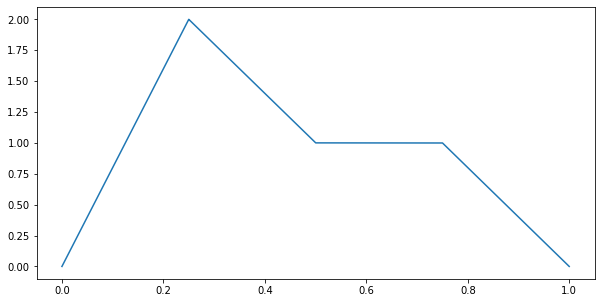

In [5]:
def inferline(x1,y1,x2,y2):
    k = (y2 - y1) / (x2 - x1) if x2 != x1 else 0
    b = y1 - k * x1
    f = lambda x: k * x + b
    return f

def envelope(times, attack=1, decay=1, sustain=1, release=1, peak=2, norm=1):
    data = zeros(times.shape)
    yy   = [peak, norm, norm, 0]
    nn   = array([attack, decay, sustain, release])
    nn   = (nn / sum(nn) * len(times)).astype(int)
    nn  -= [0,0,0,1]
    i    = 0  
    for y,n in zip(yy,nn):
        line        = inferline(times[i], data[i-1], times[i+n], y)
        data[i:i+n] = line(times[i:i+n])
        i          += n
    return data
    
tt = timescale(1)
data = envelope(tt)

rcParams['figure.figsize'] = [10,5]
n = -1
plot(tt[:n], data[:n])


In [ ]:
random()

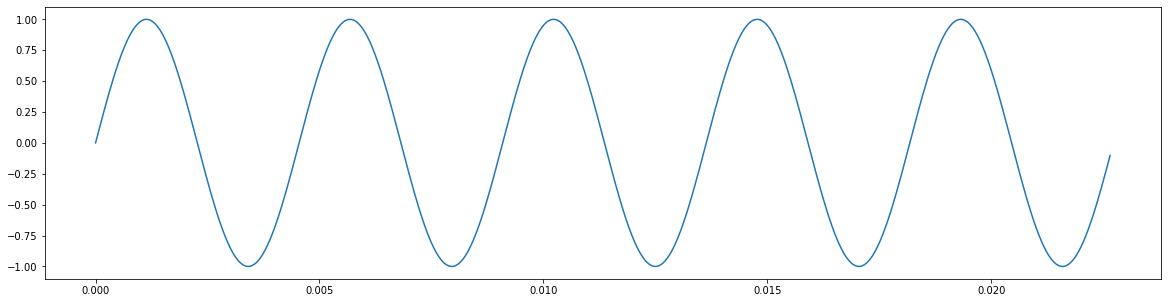

In [6]:
rcParams['figure.figsize'] = [20,5]
tt = timescale(1)
ww = sinwave(do(220), tt)
n = 1000
plot(tt[:n], ww[:n])
display(player(ww))

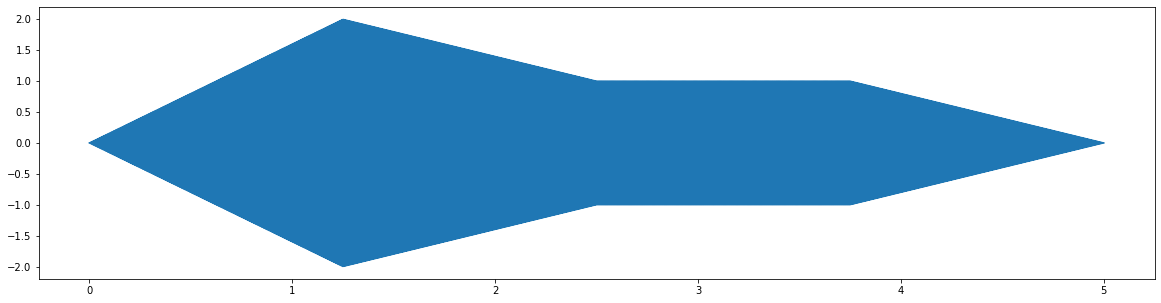

In [7]:
rcParams['figure.figsize'] = [20,5]
tt  = timescale(5)
ww1 = sinwave(do(220), tt)
ww2 = envelope(tt, attack=1, decay=1, sustain=1, release=1, peak=2, norm=1)
ww  = ww1 * ww2
n = -1
plot(tt[:n], ww[:n])
display(player(ww))

NameError: name 'items' is not defined

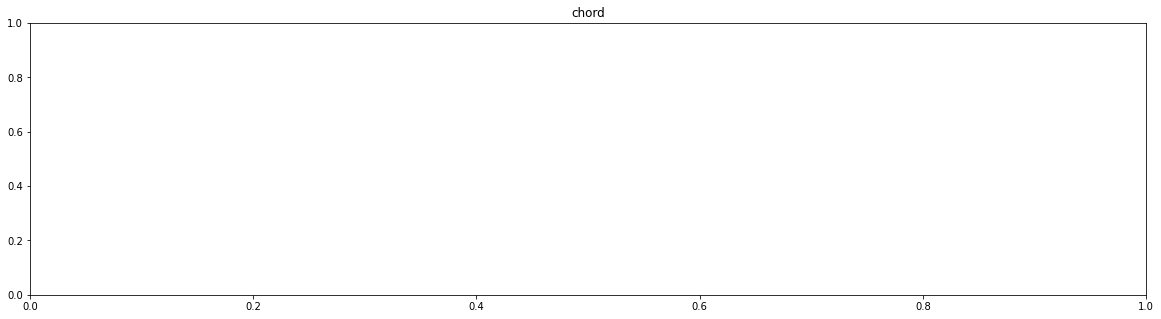

In [8]:
rcParams['figure.figsize'] = [20,5]
title('chord')

chords = {
    'Maj'       : [1, 3, 5],
    'Maj6'      : [1, 3, 5, 6],
    'Maj7'      : [1, 3, 5, 7],
    'MajAdd9'   : [1, 3, 5, 9],
    'Maj6/9'    : [1, 3, 5, 6, 9],
    'Maj9'      : [1, 3, 5, 7, 9],
    'Maj9(#11)' : [1, 3, 5, 7, 9, 11.5],
    'Maj13'     : [1, 3, 5, 7, 9, 13],
    'Min'       : [1, 2.5, 5],
    'Min6'      : [1, 2.5, 5, 6],
    'Min7'      : [1, 2.5, 5, 6.5],
    'MinAdd9'   : [1, 2.5, 5, 9], 
    'Min6/9'    : [1, 2.5, 5, 6,9],
    'Min9'      : [1, 2.5, 5, 6.5, 9], 
    'Min11'     : [1, 2.5, 5, 6.5, 9, 11], 
    'Min13'     : [1, 2.5, 5, 6.5, 9, 13],
    '7'         : [1, 3, 5, 6.5], 
    '7sus4'     : [1, 4, 5, 6.5], 
    '9'         : [1, 3, 5, 6.5, 9], 
    '9sus4'     : [1, 4, 5, 6.5, 9],
    '13'        : [1, 3, 5, 6.5, 9, 13], 
    '7(#5)'     : [1, 3, 5.5, 7], 
    '7(#9)'     : [1, 3, 5, 6.5, 9.5],
    '9(#11)'    : [1, 3, 5, 6.5, 9, 11.5],
    'Sus2'      : [1, 2, 5], 
    'Sus4'      : [1, 4, 5], 
    'Maj(#4)'   : [1, 3, 4.5, 5], 
    'Aug'       : [1, 3, 5.5], 
    'Dim'       : [1, 2.5, 4.5], 
    'Dim7'      : [1, 2.5, 4.5, 6], 
    'Min7(b5)'  : [1, 2.5, 4.5, 6.5], 
    'MinMaj7'   : [1, 2.5, 5, 7],
}

def tonescale(scale):
    tmp = {}
    for (note,coef) in items:
        if coef in tmp: tmp[coef].append(note)
        else:           tmp[coef] = [note]
    tmp = list(tmp.items())
    tmp.sort(key=first)
    note2tone  = {}
    tone2notes = {}
    for idx,(coef,notes) in enumerate(tmp):
        tone2notes[idx/2] = notes
        for note in notes:
            note2tone[note] = idx/2
    return note2tone,tone2notes

note2tone,tone2notes = tonescale(scale)

print('note2tone:',note2tone)
print('tone2notes:',tone2notes)

def chord(chord, note):
    chord = chords[chord]
    tone  = note2tone(note)
    

# def chord(freqs, times):
#     waves = [sinwave(f,times) for f in freqs]
#     wave  = sum(waves, axis=0)
#     return wave

# def clipchord(freqs, times):
#     waves = [sinwave(f,times) for f in freqs]
#     wave  = sum(waves, axis=0)
#     wave  = clip(wave,min(waves),max(waves))   
#     return wave 

# tt = timescale(1)
# ww = chord([do(440),mi(440),so(440),do(880)],tt) * envelope(tt)
# n  = -1
# plot(tt[:n], ww[:n])
# display(player(ww))

In [9]:
synth1 = lambda freqs,times: chord(freqs,times) * envelope(times)

display(player(synth1([do(220)],tt)))
display(player(synth1([re(220)],tt)))
display(player(synth1([mi(220)],tt)))
display(player(synth1([fa(220)],tt)))
display(player(synth1([so(220)],tt)))
display(player(synth1([la(220)],tt)))
display(player(synth1([ti(220)],tt)))
display(player(synth1([do(440)],tt)))

NameError: name 'chord' is not defined

In [10]:
synth1 = lambda freqs,times: clipchord(freqs,times) * envelope(times)

display(player(synth1([do(220),do(440)],tt)))
display(player(synth1([re(220),re(440)],tt)))
display(player(synth1([mi(220),mi(440)],tt)))
display(player(synth1([fa(220),fa(440)],tt)))
display(player(synth1([so(220),so(440)],tt)))
display(player(synth1([la(220),la(440)],tt)))
display(player(synth1([ti(220),ti(440)],tt)))
display(player(synth1([do(440),do(440)],tt)))

NameError: name 'clipchord' is not defined

In [29]:
ww.shape
savetext('./tmp/sinfywave01.json',repr([*ww]))

<0> <140683248387904> ./tmp/sinfywave01.json May 22 2022 21:13:24


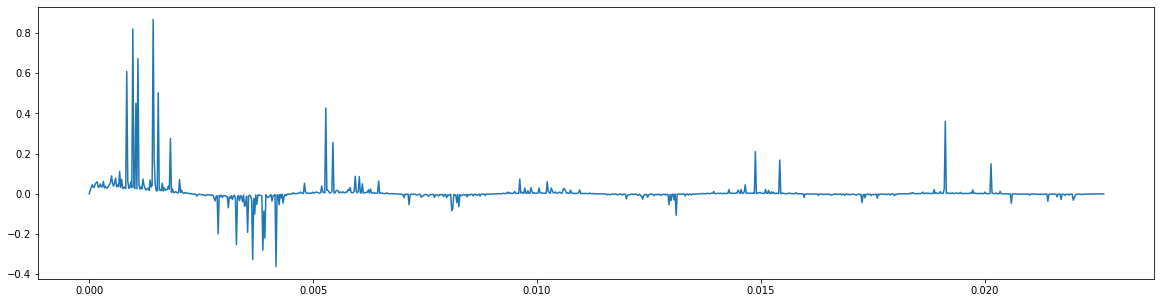

In [31]:
def sinywave(freq, times, random_fraq=0.01):     
    return sin(2 * pi * freq * times + random_fraq * random(times.shape))

def sinfwave(freq, times, fading_fraq=0.001):     
    return sin(2 * pi * freq * times) / (1 + fading_fraq*arange(len(times)))

def sinfywave(freq, times, fading_fraq=0.001):     
    return sin(2 * pi * freq * times) / (1 + random(times.shape)*arange(len(times)))

rcParams['figure.figsize'] = [20,5]
tt = timescale(1)
ww = sinfywave(do(220), tt)
n = 1000
plot(tt[:n], ww[:n])
display(player(ww))

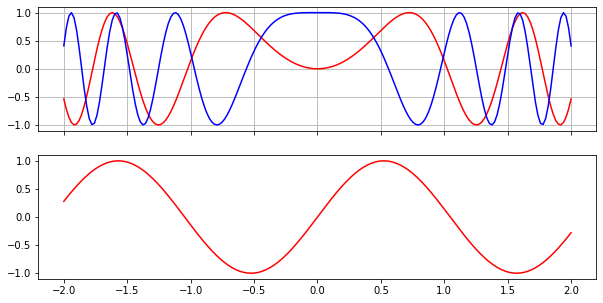

In [13]:
x = linspace(-2, 2, 200)
fig1, (ax_top, ax_bottom) = subplots(2, 1, sharex=True)
fig1.set_size_inches(10,5)
line1, line2 = ax_top.plot(x, sin(3*x**2), "r-", x, cos(5*x**2), "b-")
line3, = ax_bottom.plot(x, sin(3*x), "r-")
ax_top.grid(True)

NameError: name 'chord' is not defined

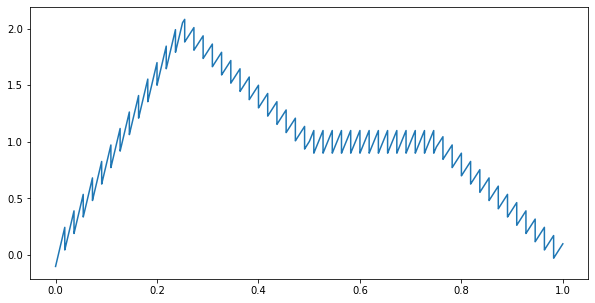

In [14]:
tt = timescale(1)
ee = envelope(tt)
ss = sawwave(55,tt)*0.1
# ss = squarewave(55,tt)*0.1
ww = ee + ss

rcParams['figure.figsize'] = [10,5]
n = -1
plot(tt[:n], ww[:n])

data = chord([do(220)],tt) * ww
display(player(data))

In [15]:
synth1 = lambda freqs,times: chord(freqs,times) * (envelope(times) + 0.1*sawwave(55,times) + 1*sinfywave(110,times))

f = 220
display(player(synth1([do(f)],tt)))
display(player(synth1([re(f)],tt)))
display(player(synth1([mi(f)],tt)))
display(player(synth1([fa(f)],tt)))
display(player(synth1([so(f)],tt)))
display(player(synth1([la(f)],tt)))
display(player(synth1([ti(f)],tt)))
display(player(synth1([do(2*f)],tt)))

NameError: name 'chord' is not defined

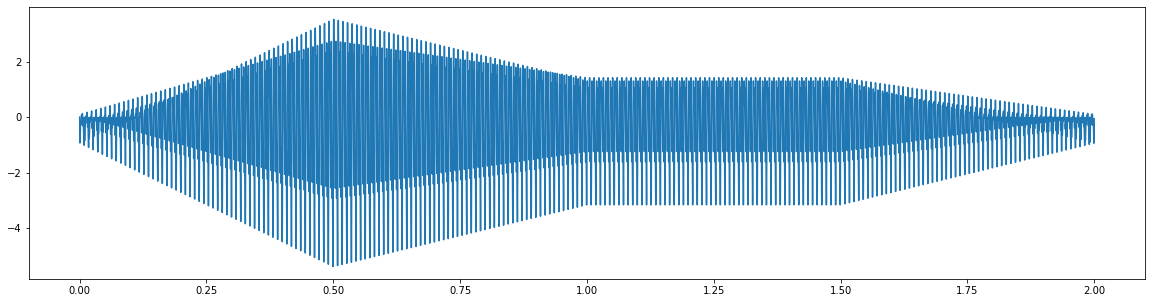

In [16]:
rcParams['figure.figsize'] = [20,5]
tt = timescale(2)

def instrument1(freq, times, env=None, saw=0.0):
    ww1 = sinwave(freq,   times)
    ww2 = sinwave(freq/2, times)
    ww3 = sinwave(freq*2, times)
    ss  = sawwave(freq/2, times) * saw
    env = env or envelope(times)
    ww  = (ww1 + ww2 + ww3) * (env+ss)
    return ww

ww = instrument1(do(220),tt,saw=0.5)
n   = -1
# n   = 3000
plot(tt[:n], ww[:n])
display(player(ww))

In [17]:
saw = 0.01
display(player(instrument1(do(220),tt,saw=saw)))
display(player(instrument1(re(220),tt,saw=saw)))
display(player(instrument1(mi(220),tt,saw=saw)))
display(player(instrument1(fa(220),tt,saw=saw)))
display(player(instrument1(so(220),tt,saw=saw)))
display(player(instrument1(la(220),tt,saw=saw)))
display(player(instrument1(ti(220),tt,saw=saw)))
display(player(instrument1(do(440),tt,saw=saw)))

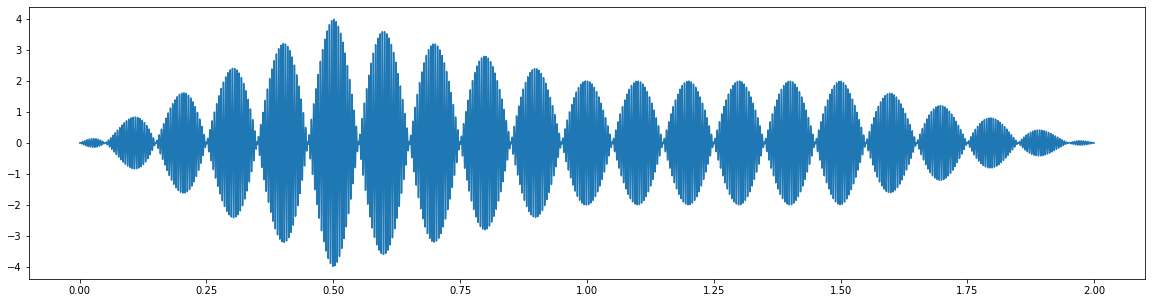

In [18]:
rcParams['figure.figsize'] = [20,5]
tt = timescale(2)

def beat1(freq, times, inc=10, env=None):
    ww1 = sinwave(freq,   times)
    ww2 = sinwave(freq+inc, times)
    env = env or envelope(times)
    ww  = (ww1 + ww2) * env
    return ww

ww = beat1(do(220),tt)
n   = -1
# n   = 3000
plot(tt[:n], ww[:n])
display(player(ww))

In [ ]:
display(player(beat1(do(220),tt)))
display(player(beat1(re(220),tt)))
display(player(beat1(mi(220),tt)))
display(player(beat1(fa(220),tt)))
display(player(beat1(so(220),tt)))
display(player(beat1(la(220),tt)))
display(player(beat1(ti(220),tt)))
display(player(beat1(do(440),tt)))